# Лабораторная работа №1 по курсу "Фундаментальные концепции ИИ 2022"
Выполнил студент группы М8О-114М-23 Шавандрин Фёдор

In [1]:
import numpy as np

## Собственная реализация классического градиентного спуска

In [2]:
def gradient_descent(X, y, learning_rate=0.01, iterations=1000, initial_theta=None):
    """
    Классический градиентный спуск.

    Параметры:
    - X: Матрица признаков (numpy array).
    - y: Вектор целевых значений (numpy array).
    - learning_rate: Скорость обучения.
    - iterations: Количество итераций градиентного спуска.
    - initial_theta: Начальные параметры модели (numpy array).

    Возвращает:
    - theta: Оптимальные параметры модели.
    - cost_history: История значений функции стоимости на каждой итерации.
    """
    m, n = X.shape
    theta = initial_theta if initial_theta is not None else np.zeros((n, 1))
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)

        theta -= learning_rate * gradient

        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history


Посмотрим на пример использования

In [3]:
# Пример использования:
# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Добавление столбца единиц для учета сдвига (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Запуск градиентного спуска
theta, cost_history = gradient_descent(X_b, y)

print("Оптимальные параметры:", theta)

Оптимальные параметры: [[4.03321421]
 [2.93070525]]


## Пайплайн тестирования алгоритма оптимизации

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

In [5]:
def cost_function(X, y, theta):
    """
    Функция стоимости для линейной регрессии.
    """
    m = len(y)
    predictions = np.dot(X, theta)
    errors = predictions - y
    cost = (1/(2*m)) * np.sum(errors**2)
    return cost

In [6]:
def generate_random_data():
    """
    Генерация случайных данных для тестирования.
    """
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)
    return X, y

### Визуализации функции и точки оптимума

In [7]:
def visualize_function(X, y, theta_history, cost_history):
    """
    Визуализация функции и точек оптимума.
    """
    fig, ax = plt.subplots(2, 1, figsize=(8, 10))

    # Визуализация функции
    ax[0].scatter(X, y, label='Training data')
    x_range = np.linspace(min(X), max(X), 100)
    y_range = theta_history[-1][0] + theta_history[-1][1] * x_range
    ax[0].plot(x_range, y_range, color='red', label='Optimal solution')
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('y')
    ax[0].legend()

    # Визуализация изменения функции стоимости
    ax[1].plot(cost_history, label='Cost Function')
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('Cost')
    ax[1].legend()

    plt.show()

In [8]:
def run_gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    """
    Запуск градиентного спуска и возвращение оптимальных параметров.
    """
    m, n = X.shape
    theta = np.zeros((n, 1))  # Инициализация параметров модели нулями
    theta_history = []
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)
        theta -= learning_rate * gradient
        theta_history.append(theta.copy())
        cost = cost_function(X, y, theta)
        cost_history.append(cost)

    return theta, theta_history, cost_history

### Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков

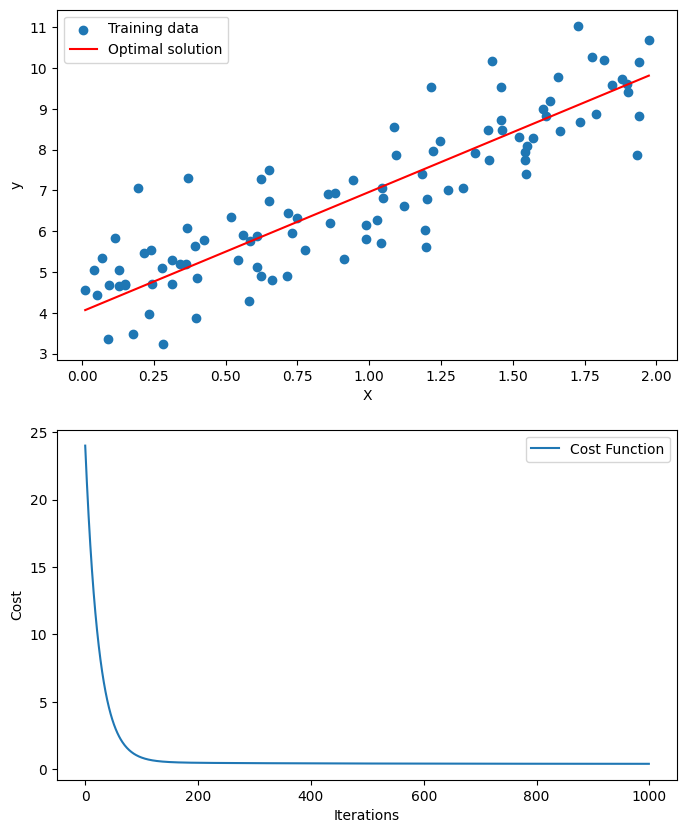

Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087
Error: 0.24263303257637087


In [9]:
def calculate_error(theta, theta_analytical):
    """
    Вычисление погрешности найденного решения в сравнение с аналитическим.
    """
    return np.linalg.norm(theta - theta_analytical)

# Генерация случайных данных
X, y = generate_random_data()

# Добавление столбца единиц для учета сдвига (bias)
X_b = np.c_[np.ones((len(y), 1)), X]

# Аналитическое решение для линейной регрессии
theta_analytical = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Запуск градиентного спуска
theta, theta_history, cost_history = run_gradient_descent(X_b, y)

# Визуализация функции и точек оптимума
visualize_function(X, y, theta_history, cost_history)

# Вычисление погрешности найденного решения в сравнение с аналитическим для нескольких запусков
iters = 10
for _ in range(iters):
    _, _, _cost_history = run_gradient_descent(X_b, y)
    _theta, _, _ = run_gradient_descent(X_b, y, iterations=len(_cost_history))
    error = calculate_error(_theta, theta_analytical)
    print(f'Error: {error}')

### Визуализация точки найденного решения (с анимацией)

In [10]:
# Визуализация точки найденного решения (с анимацией)
def update_plot(frame, X, y, theta_history):
    plt.clf()
    plt.scatter(X, y, label='Training data')
    x_range = np.linspace(min(X), max(X), 100)
    y_range = theta_history[frame][0] + theta_history[frame][1] * x_range
    plt.plot(x_range, y_range, color='red', label='Optimal solution')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

fig = plt.figure()
animation = FuncAnimation(fig, update_plot, frames=len(theta_history), fargs=(X, y, theta_history), interval=200, repeat=False)
plt.show()

<Figure size 640x480 with 0 Axes>

## Метод вычисления градиента

In [11]:
import sympy as sp

### Символьное вычисление градиента

In [12]:
def symbolic_gradient(func, variables):
    """
    Символьное вычисление градиента.

    Параметры:
    - func: Функция для вычисления градиента (sympy выражение).
    - variables: Список переменных по которым вычисляется градиент.

    Возвращает:
    - Градиент функции (sympy выражение).
    """
    gradient = [sp.diff(func, var) for var in variables]
    return gradient

### Численная аппроксимация градиента

In [13]:
def numerical_gradient(func, variables, epsilon=1e-5):
    """
    Численная аппроксимация градиента.

    Параметры:
    - func: Функция для вычисления градиента (функция Python).
    - variables: Точка, в которой вычисляется градиент (numpy array).
    - epsilon: Малое число для численной аппроксимации.

    Возвращает:
    - Градиент функции (numpy array).
    """
    gradient = np.zeros_like(variables, dtype=float)

    for i, var in enumerate(variables):
        perturbation = np.zeros_like(variables)
        perturbation[i] = epsilon
        gradient[i] = (func(*(variables + perturbation)) - func(*(variables - perturbation))) / (2 * epsilon)

    return gradient

In [14]:
# Пример использования:

# 1. Передача функции градиента от пользователя
def user_defined_function(x, y):
    return x**2 + 2*y**2

variables = sp.symbols('x y')
func_symbolic = user_defined_function(*variables)
gradient_symbolic = symbolic_gradient(func_symbolic, variables)
print("Symbolic Gradient:", gradient_symbolic)

# 2. Символьное вычисление градиента (например с помощью sympy)

# Преобразование символьного градиента в функцию
func_numeric = sp.lambdify(variables, func_symbolic, 'numpy')
gradient_numeric = sp.lambdify(variables, gradient_symbolic, 'numpy')

# Точка, в которой вычисляется градиент
point = np.array([1.0, 2.0])

# Вычисление градиента численно
gradient_numeric_result = gradient_numeric(*point)
print("Numeric Gradient:", gradient_numeric_result)

# 3. Численная аппроксимация градиента

# Точка, в которой вычисляется градиент (используем ту же точку)
gradient_numerical_result = numerical_gradient(func_numeric, point)
print("Numerical Gradient:", gradient_numerical_result)

Symbolic Gradient: [2*x, 4*y]
Numeric Gradient: [2.0, 8.0]
Numerical Gradient: [2. 8.]


## Моментная модификация градиентного спуска и её тестирование

In [15]:
def gradient_descent_with_momentum(X, y, learning_rate=0.01, momentum=0.9, iterations=1000):
    """
    Градиентный спуск с использованием метода моментов.

    Параметры:
    - X: Матрица признаков (numpy array).
    - y: Вектор целевых значений (numpy array).
    - learning_rate: Скорость обучения.
    - momentum: Коэффициент инерции.
    - iterations: Количество итераций градиентного спуска.

    Возвращает:
    - theta: Оптимальные параметры модели.
    - cost_history: История значений функции стоимости на каждой итерации.
    """

    m, n = X.shape
    theta = np.zeros((n, 1))  # Инициализация параметров модели нулями
    velocity = np.zeros((n, 1))  # Инициализация вектора скорости
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)

        # Обновление вектора скорости
        velocity = momentum * velocity - learning_rate * gradient

        # Обновление параметров модели с использованием вектора скорости
        theta += velocity

        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

In [16]:
# Пример использования:

# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Добавление столбца единиц для учета сдвига (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Запуск градиентного спуска с использованием метода моментов
theta_momentum, cost_history_momentum = gradient_descent_with_momentum(X_b, y)

print("Оптимальные параметры с методом моментов:", theta_momentum)

Оптимальные параметры с методом моментов: [[4.21509616]
 [2.77011339]]


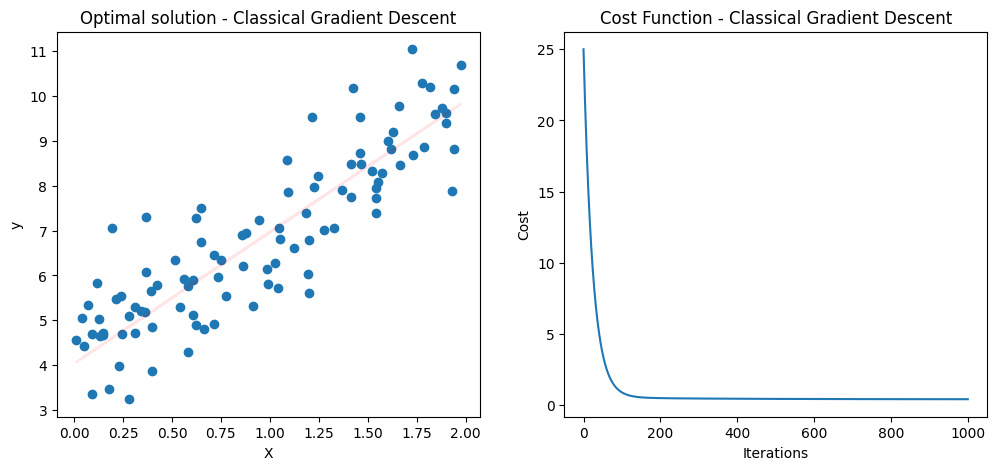

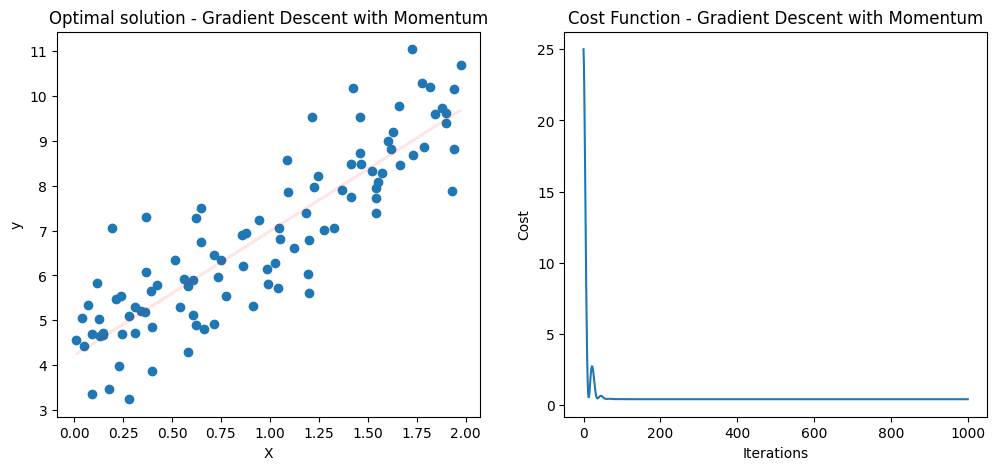

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_gradient_descent(X, y, theta_history, cost_history, title):
    """
    Визуализация функции и точек оптимума для градиентного спуска.

    Параметры:
    - X: Матрица признаков (numpy array).
    - y: Вектор целевых значений (numpy array).
    - theta_history: История изменения параметров модели.
    - cost_history: История значений функции стоимости.
    - title: Заголовок графика.
    """
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))

    # Визуализация функции и точек оптимума
    ax[0].scatter(X[:, 1], y, label='Training data')
    for theta in theta_history:
        ax[0].plot(X[:, 1], X.dot(theta), color='red', alpha=0.1)
    ax[0].set_xlabel('X')
    ax[0].set_ylabel('y')
    ax[0].set_title(f'Optimal solution - {title}')

    # Визуализация изменения функции стоимости
    ax[1].plot(cost_history, label='Cost Function')
    ax[1].set_xlabel('Iterations')
    ax[1].set_ylabel('Cost')
    ax[1].set_title(f'Cost Function - {title}')

    plt.show()

# Градиентный спуск
theta_classical, cost_history_classical = gradient_descent(X_b, y)
visualize_gradient_descent(X_b, y, [theta_classical], cost_history_classical, 'Classical Gradient Descent')

# Градиентный спуск с методом моментов
theta_momentum, cost_history_momentum = gradient_descent_with_momentum(X_b, y)
visualize_gradient_descent(X_b, y, [theta_momentum], cost_history_momentum, 'Gradient Descent with Momentum')


## Адаптивная модификация градиентного спуска и её тестирование

In [18]:
def gradient_descent_with_adagrad(X, y, learning_rate=0.01, epsilon=1e-8, iterations=1000):
    """
    Градиентный спуск с использованием метода Adagrad.

    Параметры:
    - X: Матрица признаков (numpy array).
    - y: Вектор целевых значений (numpy array).
    - learning_rate: Скорость обучения.
    - epsilon: Защита от деления на ноль.
    - iterations: Количество итераций градиентного спуска.

    Возвращает:
    - theta: Оптимальные параметры модели.
    - cost_history: История значений функции стоимости на каждой итерации.
    """

    m, n = X.shape
    theta = np.zeros((n, 1))  # Инициализация параметров модели нулями
    G = np.zeros((n, 1))  # Инициализация кумулятивного квадрата градиента
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)

        # Обновление кумулятивного квадрата градиента
        G += gradient**2

        # Обновление параметров модели с использованием Adagrad
        theta -= (learning_rate / np.sqrt(G + epsilon)) * gradient

        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return theta, cost_history

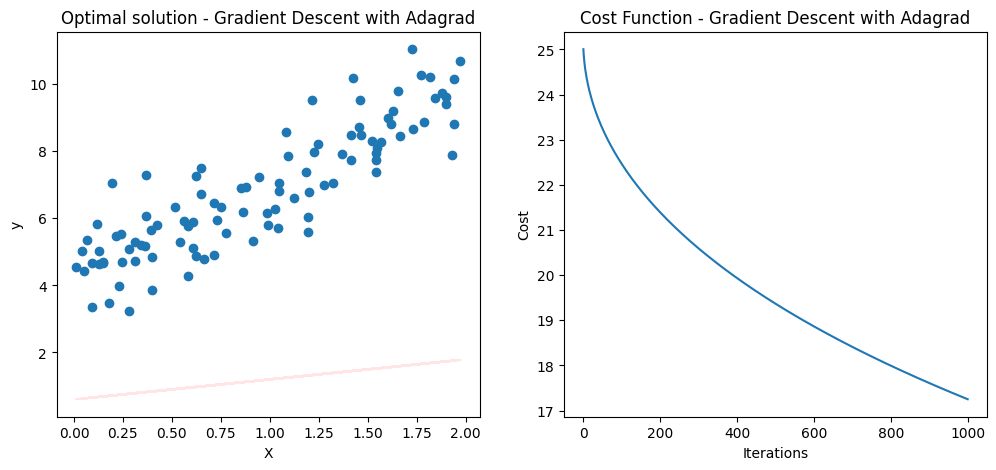

In [19]:
# Пример использования:

# Генерация случайных данных
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Добавление столбца единиц для учета сдвига (bias)
X_b = np.c_[np.ones((100, 1)), X]

# Запуск градиентного спуска с использованием Adagrad
theta_adagrad, cost_history_adagrad = gradient_descent_with_adagrad(X_b, y)

# Визуализация функции и точек оптимума для Adagrad
visualize_gradient_descent(X_b, y, [theta_adagrad], cost_history_adagrad, 'Gradient Descent with Adagrad')

## Метод эфолюции темпа обучения

In [20]:
def gradient_descent_with_annealing(X, y, initial_learning_rate=0.1, decay_rate=0.95, iterations=1000):
    """
    Градиентный спуск с использованием эволюции темпа обучения.

    Параметры:
    - X: Матрица признаков (numpy array).
    - y: Вектор целевых значений (numpy array).
    - initial_learning_rate: Начальная скорость обучения.
    - decay_rate: Коэффициент затухания.
    - iterations: Количество итераций градиентного спуска.

    Возвращает:
    - theta: Оптимальные параметры модели.
    - cost_history: История значений функции стоимости на каждой итерации.
    """

    m, n = X.shape
    theta = np.zeros((n, 1))  # Инициализация параметров модели нулями
    learning_rate = initial_learning_rate
    cost_history = []

    for _ in range(iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = (1/m) * np.dot(X.T, errors)

        # Обновление параметров модели с использованием эволюции темпа обучения
        theta -= learning_rate * gradient

        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

        # Экспоненциальное затухание темпа обучения
        learning_rate *= decay_rate

    return theta, cost_history

## Метод выбора начального приближения

In [21]:
def initialize_parameters(n):
    """
    Инициализация параметров модели случайными значениями.

    Параметры:
    - n: Количество параметров модели.

    Возвращает:
    - theta: Инициализированные параметры модели.
    """
    return np.random.randn(n, 1)

## Тестирование обоих методов

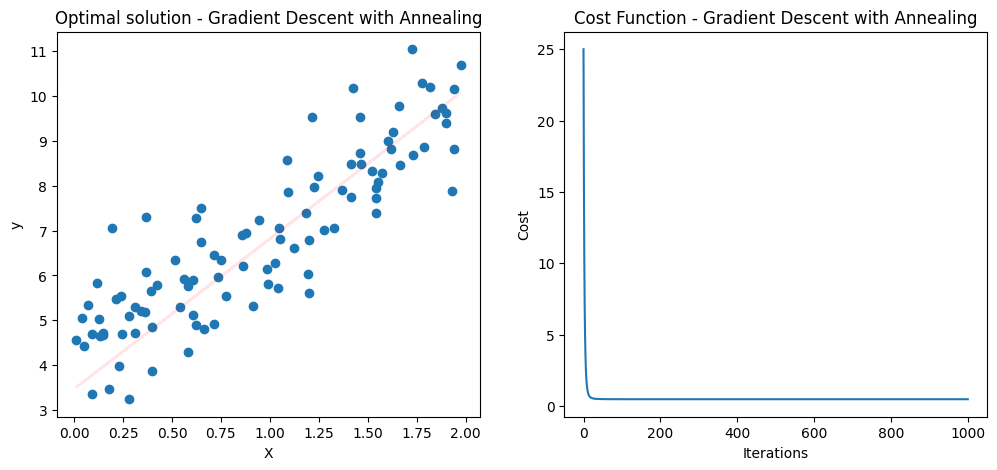

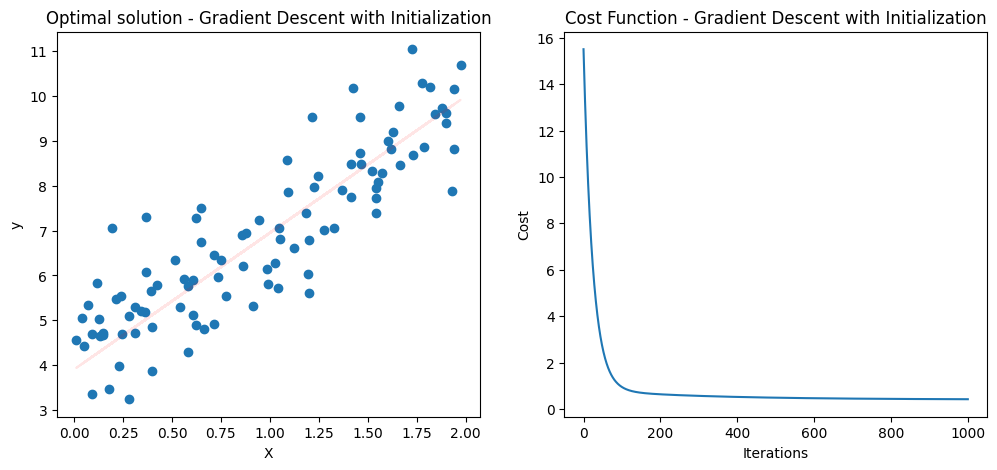

In [22]:
# Градиентный спуск с эволюцией темпа обучения
theta_annealing, cost_history_annealing = gradient_descent_with_annealing(X_b, y)

# Визуализация функции и точек оптимума для эволюции темпа обучения
visualize_gradient_descent(X_b, y, [theta_annealing], cost_history_annealing, 'Gradient Descent with Annealing')

# Градиентный спуск с методом выбора начального приближения
theta_initialized = initialize_parameters(X_b.shape[1])
theta_initialized, cost_history_initialized = gradient_descent(X_b, y, initial_theta=theta_initialized)

# Визуализация функции и точек оптимума для метода выбора начального приближения
visualize_gradient_descent(X_b, y, [theta_initialized], cost_history_initialized, 'Gradient Descent with Initialization')

## Тестовых функции Матьяса и МакКормика , нахождение оптимума 3 разными алгоритмами доступными в библиотеке и таблица сравнения

In [2]:
pip install pygmo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 58.5 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [44]:
import pygmo as pg
import pandas as pd

# Определение класса для тестовой функции Matyas
class MatyasFunction:
    def fitness(self, x):
        return [0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]]

    def get_bounds(self):
        return ([-10, -10], [10, 10])

# Определение класса для тестовой функции McCormick
class McCormickFunction:
    def fitness(self, x):
        return [np.sin(x[0] + x[1]) + (x[0] - x[1])**2 - 1.5 * x[0] + 2.5 * x[1] + 1]

    def get_bounds(self):
        return ([-1.5, -3], [4, 4])

# Определение алгоритмов оптимизации
algorithms = [
    pg.algorithm(pg.de(gen=100)),
    pg.algorithm(pg.de1220(gen=100)),
    pg.algorithm(pg.sga(gen=100))
]

# Запуск оптимизации и сбор результатов
results = []
for algo in algorithms:
    problem_matyas = pg.problem(MatyasFunction())
    pop_matyas = pg.population(problem_matyas, size=10)
    pop_matyas = algo.evolve(pop_matyas)
    result_matyas = pop_matyas.get_f()[0]  # Исправлено здесь

    problem_mccormick = pg.problem(McCormickFunction())
    pop_mccormick = pg.population(problem_mccormick, size=10)
    pop_mccormick = algo.evolve(pop_mccormick)
    result_mccormick = pop_mccormick.get_f()[0]  # Исправлено здесь

    results.append([result_matyas, result_mccormick])

# Создание таблицы сравнения
df = pd.DataFrame(results, columns=['Matyas', 'McCormick'])
df.index = ['Algorithm 1', 'Algorithm 2', 'Algorithm 3']

# Вывод результатов
print(df)

                              Matyas              McCormick
Algorithm 1  [7.977453532566619e-08]  [-1.9132228949068377]
Algorithm 2  [6.140927872320415e-08]   [-1.913222878150239]
Algorithm 3    [0.15422977411515237]  [-1.9058919856916594]
